# a)

In [1]:
scenarios = [
    (0.7, 8, 4),
    (0.7, 10, 2),
    (0.3, 8, 4),
    (0.5, 9, 3),
    (0.5, 5, 7)
]

result = []

for s in scenarios:
  p, votes_for_1, votes_for_0 = s[0], s[1], s[2]
  pA = (p**max(votes_for_1, votes_for_0)) * ((1-p)**(12-max(votes_for_1, votes_for_0)))
  pB = (p**votes_for_0)*((1-p)**votes_for_1) + (p**votes_for_1)*((1-p)**votes_for_0)
  pCondition = pA / pB
  result.append(pCondition)

for i, r in enumerate(result):
  print(f"scenario {i+1}:", r)

scenario 1: 0.967365028203062
scenario 2: 0.9988631799564817
scenario 3: 0.032634971796937945
scenario 4: 0.5
scenario 5: 0.5


The probability of majority vote being correct is connected to p such that the more the accuracy of individual probability, the better overall accuracy of majority vote and vice versa.

# b)

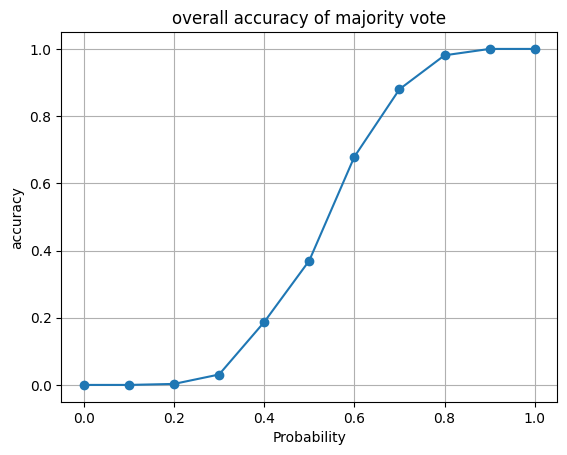

In [2]:
import random
import matplotlib.pyplot as plt
random.seed(501)

def accuracy(probability, num_of_voters):
  vote = [True, False]
  weight = [probability, 1-probability]

  correct_assumptions = 0
  for _ in range(1000):
    random_choices = random.choices(vote, weights=weight, k=num_of_voters)
    correct_choices = random_choices.count(True)
    if correct_choices > (num_of_voters/2):
      correct_assumptions += 1

  return correct_assumptions/1000

probabilities = [round(i * 0.1, 1) for i in range(11)]
accuracies = []
for probability in probabilities:
  accuracies.append(accuracy(probability, 12))

plt.plot(probabilities, accuracies, marker='o')
plt.xlabel('Probability')
plt.ylabel('accuracy')
plt.title('overall accuracy of majority vote')
plt.grid(True)
plt.show()

# g)

In [4]:
for probability in probabilities:
  if accuracy(probability, 12) == 1:
    print('Optimal:', probability)
    break

Optimal: 0.9


# d)

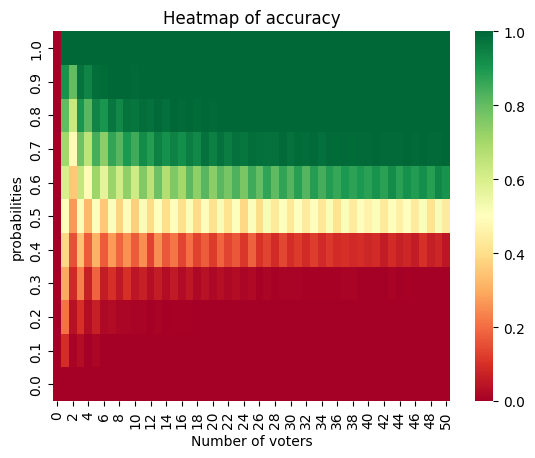

In [5]:
import pandas as pd
import seaborn as sns

data = {}
for n in range(0, 51):
  data[n] = []
  for p in probabilities:
    data[n].append(accuracy(p, n))

dataFrame = pd.DataFrame(data, index=probabilities)
dataFrame = dataFrame[::-1]
sns.heatmap(dataFrame, cmap='RdYlGn')
plt.title('Heatmap of accuracy')
plt.xlabel('Number of voters')
plt.ylabel('probabilities')
plt.show()